**RECRUITING ANALYSYS**

O objectivo desta análise é a identificação dos perfis que tendem a desistir no processo de recrutamento.

Elaboração do Documento:
    
    - Autor: Diogo Santos
    - Data: 13 de Março de 2018

In [115]:
#Importing necessary libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Importing the data
data=pd.read_csv(r'C:\Users\dsilsant\Desktop\Projecto Recruiting\Data for Import\Recruiting_Data_import.csv',sep=';',encoding='latin-1')
print('Os dados importados tem {} colunas e {} registos.'.format(data.shape[1],data.shape[0]))

Os dados importados tem 26 colunas e 11287 registos.


In [116]:
data.head()

,Contratado,Desistencia,EstadoCandidatura,AnoNascimento,MesNascimento,Curso,Universidade,TipoCurso,OrigemCandidatura,Recomendado,...,TotalEntrevista,AnoRecepcao,MesRecepcao,AnaliseResponsavel,Responsavel1Entrevista,AreaEveris,Nível,Responsavel2Entrevista,EntrevistaFinalResponsavel,Fases
0,0,1,Entrevista Inicial,1980.0,7.0,IT,FC - U LISBOA,Mestrado,Espontânea,Não,...,151,2010.0,1.0,NFG,RDM,NaN,NaN,NaN,NaN,1
1,0,0,Testes,1983.0,4.0,Engenharia,IST,Mestrado,Referenciada,Não,...,67,2010.0,1.0,SCC,NaN,NaN,NaN,NaN,NaN,1
2,0,1,Análise,NaN,NaN,Economia,ISCTE,Licenciatura,Headhunting,Não,...,0,2010.0,1.0,NFG,NaN,NaN,NaN,NaN,NaN,0
3,0,1,Entrevista Intermédia,1984.0,3.0,Engenharia,IST,Mestrado,Headhunting,Não,...,14,2010.0,1.0,RJS,TSB,05 - Business,Júnior com Experiência,RJS,NaN,2
4,0,1,Análise,NaN,NaN,Engenharia IT,IST,Licenciatura,Headhunting,Não,...,0,2010.0,1.0,RJS,NaN,NaN,NaN,NaN,NaN,0


In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11287 entries, 0 to 11286
Data columns (total 26 columns):
Contratado                     11287 non-null int64
Desistencia                    11287 non-null int64
EstadoCandidatura              11287 non-null object
AnoNascimento                  9144 non-null float64
MesNascimento                  9144 non-null float64
Curso                          10797 non-null object
Universidade                   10543 non-null object
TipoCurso                      11018 non-null object
OrigemCandidatura              11015 non-null object
Recomendado                    11287 non-null object
Disponibilidade                11287 non-null object
Grupo                          11287 non-null object
AnaliseTeste                   11287 non-null int64
Testes_1Entrevista             11287 non-null int64
1Entrevista_2Entrevista        11287 non-null int64
2Entrevista_EntrevistaFinal    11287 non-null int64
TotalEntrevista                11287 non-null int

In [117]:
data.loc[data['TipoCurso']=='Bacharelato','TipoCurso']='Licenciatura' #Passar Bacharelato a Licenciatura
data.loc[data['TipoCurso']=='Curso Tecnológico','TipoCurso']='12º Ano' #Passar Cursos Tecnológico a 12ano
data.loc[data['TipoCurso']=='12º Ano','Universidade']='Sem Universidade' #Colocar pessoas com 12ano sem universidade
data.loc[data['TipoCurso']=='12º Ano','Curso']='Sem Curso' #Colocar pessoas com 12ano sem curso

**EXPLORAÇÂO DE DADOS**

**DESISTENCIA**


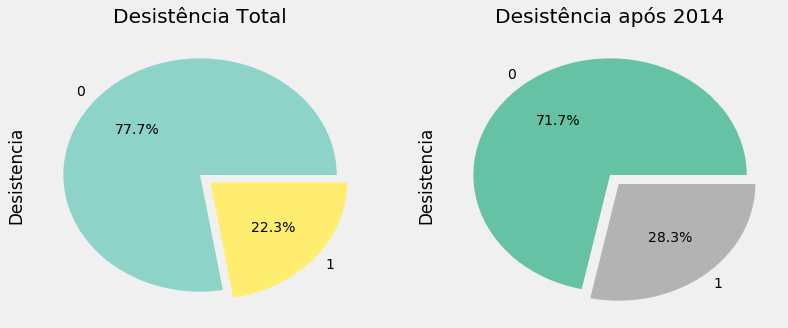

In [118]:
#DESISTENCIA
f,ax=plt.subplots(1,2,figsize=(12,5))
data['Desistencia'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],colormap='Set3')
ax[0].set_title('Desistência Total')

data.loc[data['AnoRecepcao']>2014,'Desistencia'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],colormap='Set2')
ax[1].set_title('Desistência após 2014')
plt.show()

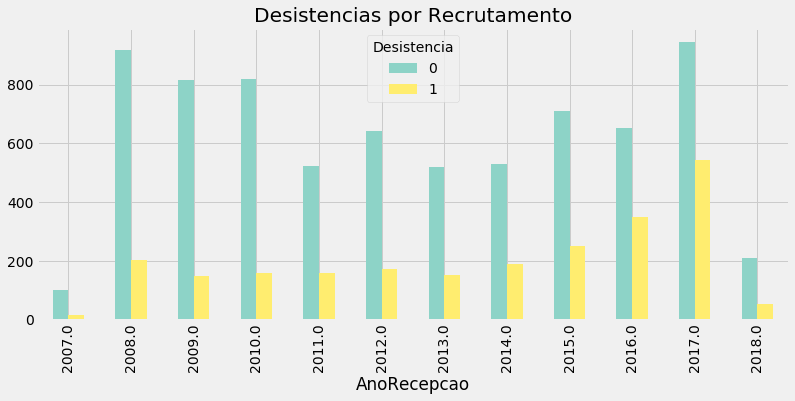

,Ano Recepção,Total Processos,Valores Médios
11,2018.0,262,0.198473
10,2017.0,1490,0.365101
9,2016.0,1001,0.348651
8,2015.0,959,0.259645
7,2014.0,719,0.261474
6,2013.0,669,0.225710
5,2012.0,812,0.210591
4,2011.0,680,0.232353
3,2010.0,977,0.162743
2,2009.0,965,0.153368


In [122]:
#CONTRATACAO
datacontratado=data.loc[data['Contratado']==0,]

pd.crosstab(datacontratado.AnoRecepcao,datacontratado.Desistencia).plot(kind='bar',figsize=(12,5),colormap='Set3')
plt.title('Desistencias por Recrutamento')
plt.show()

amean=datacontratado.groupby(['AnoRecepcao'])['Desistencia'].mean()
acount=datacontratado.groupby(['AnoRecepcao'])['Desistencia'].count()
mediarecepcao=pd.concat([pd.DataFrame({'Ano Recepção':amean.index}),pd.DataFrame({'Total Processos':acount.values}),
                        pd.DataFrame({'Valores Médios':amean.values})],axis=1)
mediarecepcao.sort_values(by=['Ano Recepção'],ascending=False)

COMENTÁRIOS:
- De todos os candidatos incluidos na base de dados desde 2007 a 2019, 22.3% sairam devido a Desistência
- Os níveis de recrutamento tem vindo a aumentar desde 2013
- A taxa de Desistência aumentou em termos relativos, rondado a média em 2017 nos 37%, o número mais alto de sempre.

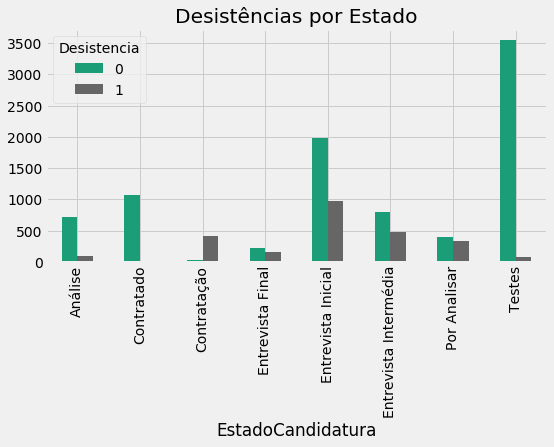

In [314]:
#ESTADO CANDIDATURA
pd.crosstab(data.EstadoCandidatura,data.Desistencia).plot(kind='bar',figsize=(8,4),colormap='Dark2')
plt.title('Desistências por Estado')
plt.show()

COMENTÁRIOS:
- Em termos absolutos a maior parte dos candidatos desistem na fase de Entrevista Inicial
- Em termos relativos a desistência está nas fases de Contratação e Entrevista Final

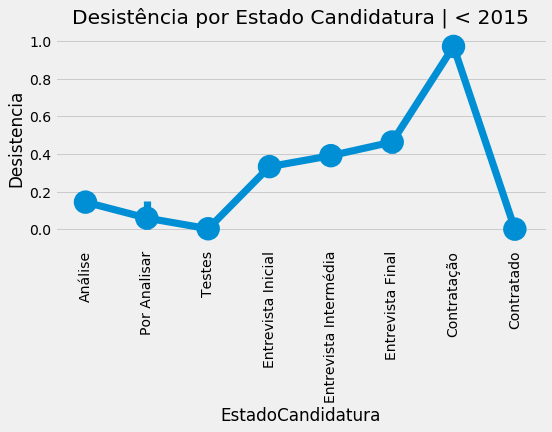

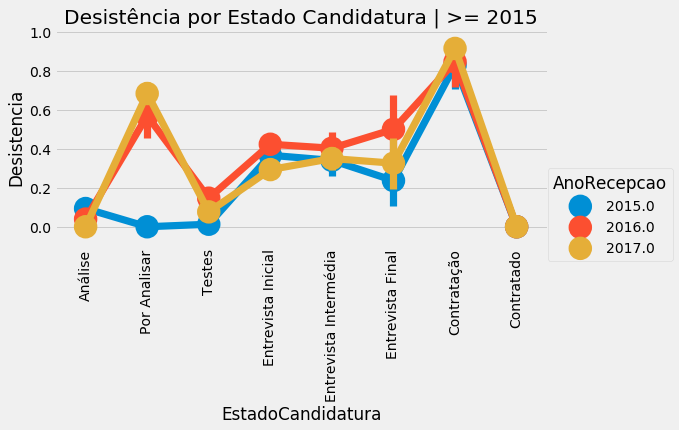

In [188]:
#ESTADO CANDIDATURA
sns.factorplot('EstadoCandidatura','Desistencia',data=data.loc[(data['AnoRecepcao']<2015),],size=4,aspect=2,
              order=['Análise','Por Analisar','Testes','Entrevista Inicial','Entrevista Intermédia','Entrevista Final','Contratação','Contratado'])
plt.title('Desistência por Estado Candidatura | < 2015')
plt.xticks(rotation=90)

sns.factorplot('EstadoCandidatura','Desistencia',hue='AnoRecepcao',data=data.loc[(data['AnoRecepcao']>=2015)&(data['AnoRecepcao']<2018)],size=4,aspect=2,
              order=['Análise','Por Analisar','Testes','Entrevista Inicial','Entrevista Intermédia','Entrevista Final','Contratação','Contratado'])
plt.title('Desistência por Estado Candidatura | >= 2015')
plt.xticks(rotation=90)
plt.show()

COMENTÁRIOS:
Confirma-se para os anos mais recentes (2015-2017) que as desistências são essencialmente nas Fases:
- Contratação
- Por Analisar (Destaca-se o elevado aumento que houve de 2015 em diante)

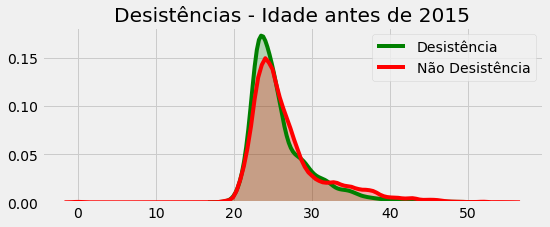

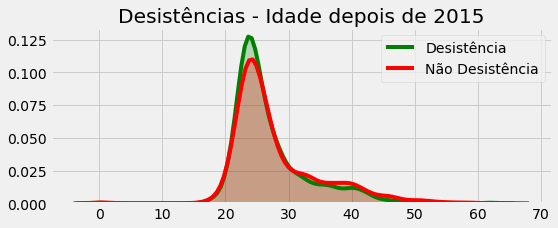

In [4]:
data['Idade']= 0
data['Idade']=data['AnoRecepcao'] - data['AnoNascimento']

fig=plt.figure(figsize=(8,3),)
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==1)&(data['AnoRecepcao']<2015),'Idade'],color='g',shade=True,label='Desistência')
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==0)&(data['AnoRecepcao']<2015),'Idade'],color='r',shade=True,label='Não Desistência')
plt.title('Desistências - Idade antes de 2015')

fig=plt.figure(figsize=(8,3),)
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==1)&(data['AnoRecepcao']>=2015),'Idade'],color='g',shade=True,label='Desistência')
sns.kdeplot(data.loc[(data['Idade'].notnull())&(data['Desistencia']==0)&(data['AnoRecepcao']>=2015),'Idade'],color='r',shade=True,label='Não Desistência')
plt.title('Desistências - Idade depois de 2015')

plt.show()

Idade sem impacto na detecção de desistências.

**RESTANTES VARIÁVEIS**

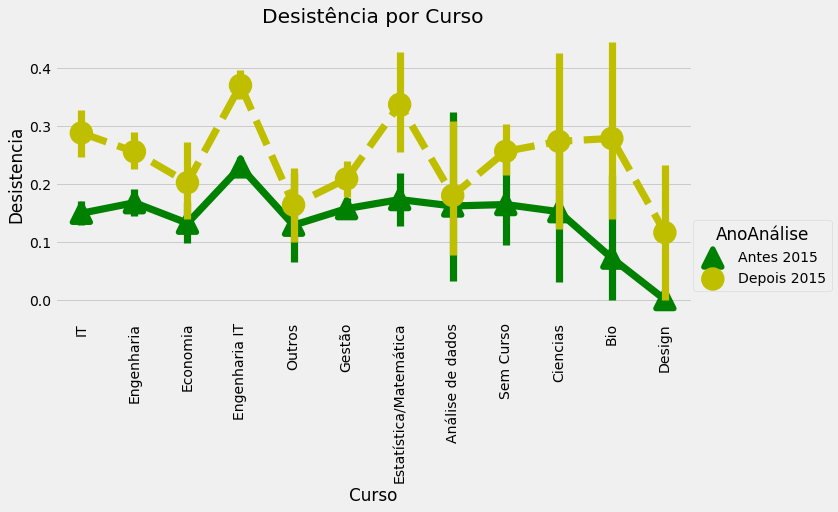

In [9]:
#CURSO DE FORMAÇÃO

Curso=data.loc[data['AnoRecepcao'].notnull(),['TipoCurso','Curso','Desistencia','AnoRecepcao','OrigemCandidatura',
                                             'Recomendado','Disponibilidade','Grupo','AnaliseTeste', 
                                              'Testes_1Entrevista', '1Entrevista_2Entrevista',
                                              '2Entrevista_EntrevistaFinal', 'TotalEntrevista','Fases',
                                             'Contratado','EstadoCandidatura']]
Curso['AnoAnálise']=0
Curso.loc[Curso['AnoRecepcao']<2015,'AnoAnálise']='Antes 2015'
Curso.loc[Curso['AnoRecepcao']>=2015,'AnoAnálise']='Depois 2015'

sns.factorplot('Curso','Desistencia',hue='AnoAnálise',data=Curso,size=5,aspect=2,
              palette={"Antes 2015": "g", "Depois 2015": "y"},
              markers=["^", "o"], linestyles=["-", "--"])
plt.title('Desistência por Curso')
plt.xticks(rotation=90)
plt.show()

In [193]:
Curso['AnoAnálise'].value_counts()

Antes 2015     6576
Depois 2015    4215
Name: AnoAnálise, dtype: int64

COMMENTS:
- Engenharia IT é o curso onde existêm mais desistências, indepentemente das datas;
- Cursos em IT e Estatistica/Matemática, tem vindo aumentar as desistências para além do aumento em geral;
- Outros Cursos e Cursos em Análise de Dados, mantiveram os níveis de desistência.

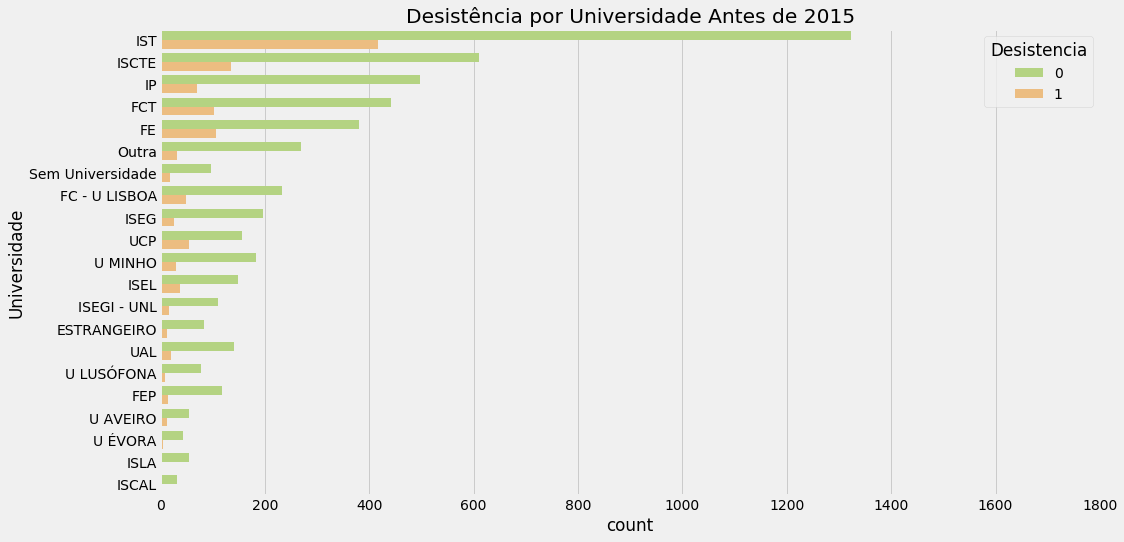

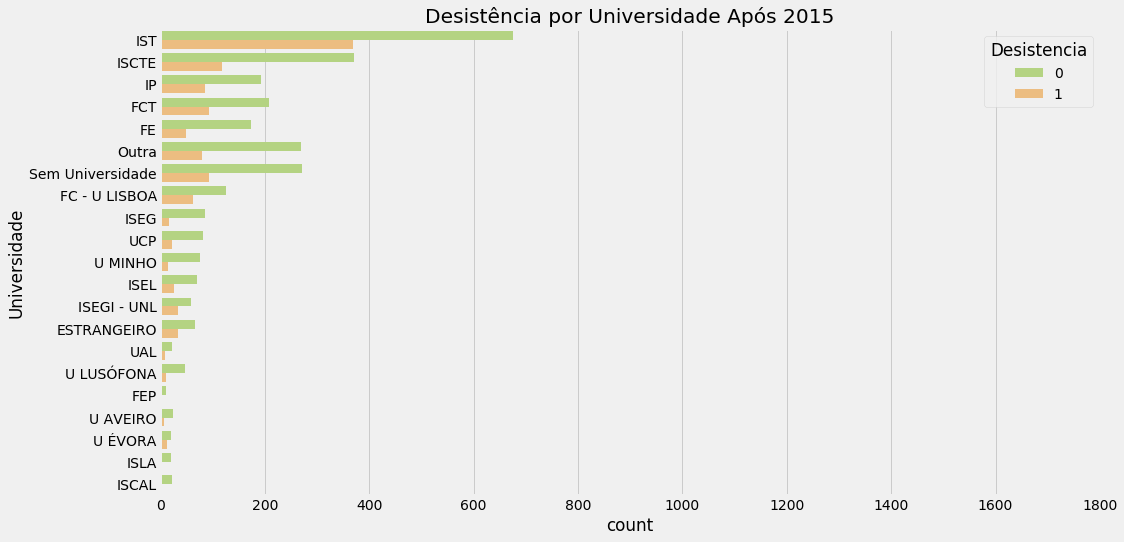

In [5]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y='Universidade', hue='Desistencia', 
              data=data.loc[(data['AnoRecepcao']<2015),],
             palette='RdYlGn_r',
             order=data['Universidade'].value_counts().index)
plt.title('Desistência por Universidade Antes de 2015')
plt.xticks(range(0,1801,200))

f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y='Universidade', hue='Desistencia', 
              data=data.loc[(data['AnoRecepcao']>=2015),],
             palette='RdYlGn_r',
             order=data['Universidade'].value_counts().index).set_title('Desistência por Universidade Após 2015')
plt.xticks(range(0,1801,200))
plt.show()

In [6]:
a=data.loc[(data['AnoRecepcao']<2015),].groupby(['Universidade'])['Desistencia'].mean()#.sort_values(ascending=False)
b=data.loc[(data['AnoRecepcao']>=2015),].groupby(['Universidade'])['Desistencia'].mean()#.sort_values(ascending=False)
collumns=np.transpose(a.index)
avalues=np.transpose(a.values)
bvalues=np.transpose(b.values)

means=pd.concat([pd.DataFrame({'Universidade':collumns}),pd.DataFrame({'Média Antes 2015':avalues}),pd.DataFrame({'Média Depois 2015':bvalues})],axis=1)
means.sort_values(by=['Média Depois 2015'],ascending=False)

,Universidade,Média Antes 2015,Média Depois 2015
18,U ÉVORA,0.122449,0.375000
9,ISEGI - UNL,0.133858,0.365591
12,IST,0.239518,0.353110
0,ESTRANGEIRO,0.125000,0.336634
1,FC - U LISBOA,0.173759,0.329787
5,IP,0.123239,0.309353
2,FCT,0.187845,0.307947
19,UAL,0.128834,0.281250
10,ISEL,0.198925,0.278351
14,Sem Universidade,0.163793,0.255495


COMMENTS:
- De acordo com os gráficos é possível ver que o IST, ISCTE, IP e FCT, lideram o ranking de faculdades com mais processos de recrutamento;
- Na tabela podemos ver que as médias de desistência aumentaram imenso depois de 2015.
- O ranking de desistências é liderado por:
    - U ÉVORA(faculdade que manteve pouco volume de recrutamento) passou de 0.12 a 0.38
    - ISEGI (meio da tabela em volume) que ainda assim reduziu de 0.13 a 0.37, neste caso o que reduziu foi o nível de recrutamento
    - IST (faculdade com mais volume) que passou de 0.23 a 0.35

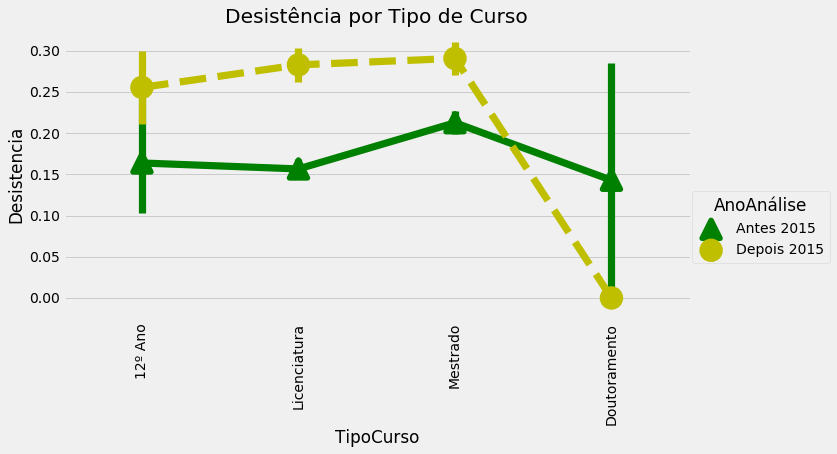

In [501]:
#TIPO DE CURSO
sns.factorplot('TipoCurso','Desistencia',hue='AnoAnálise',data=Curso,size=5,aspect=2,
              palette={"Antes 2015": "g", "Depois 2015": "y"},
              markers=["^", "o"], linestyles=["-", "--"],
              order=['12º Ano','Licenciatura','Mestrado','Doutoramento'])
plt.title('Desistência por Tipo de Curso')
plt.xticks(rotation=90)
plt.show()

COMMENTS:
- O maior crescimento deu-se nos individuos com Licenciatura.

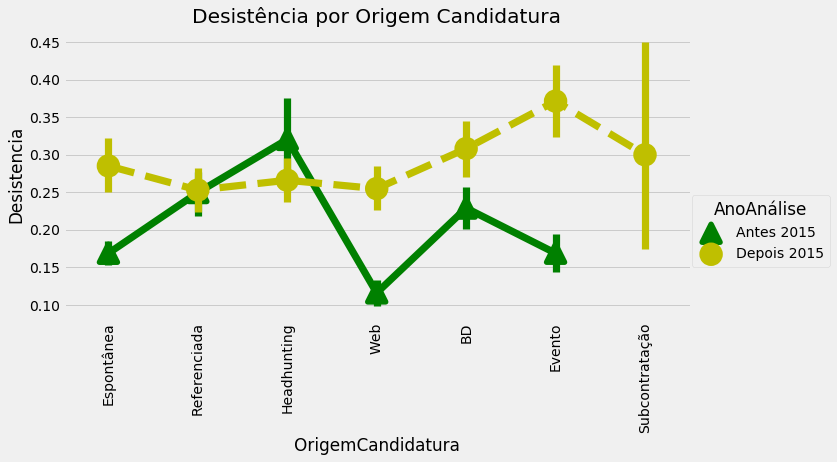

Antes de 2015 
                        mean  count
OrigemCandidatura                 
BD                 0.229000   1000
Espontânea         0.168798   1955
Evento             0.168845    918
Headhunting        0.320513    312
Referenciada       0.249704    845
Web                0.115983   1414 

Depois de 2015 
                        mean  count
OrigemCandidatura                 
BD                 0.308271    665
Espontânea         0.285185    540
Evento             0.371490    463
Headhunting        0.266065    887
Referenciada       0.252980    755
Subcontratação     0.300000     40
Web                0.254926    812


In [51]:
#ORIGEM CANDIDATURA

sns.factorplot('OrigemCandidatura','Desistencia',hue='AnoAnálise',data=Curso,size=5,aspect=2,
              palette={"Antes 2015": "g", "Depois 2015": "y"},
              markers=["^", "o"], linestyles=["-", "--"])
plt.title('Desistência por Origem Candidatura')
plt.xticks(rotation=90)
plt.show()

print('Antes de 2015 \n',
      data.loc[(data['AnoRecepcao']<2015),['Desistencia','OrigemCandidatura']].groupby(['OrigemCandidatura'])['Desistencia'].agg(['mean','count']),'\n')
print('Depois de 2015 \n',
      data.loc[(data['AnoRecepcao']>=2015),['Desistencia','OrigemCandidatura']].groupby(['OrigemCandidatura'])['Desistencia'].agg(['mean','count']))


COMMENTS:
- Candidatos referenciados mantêm os níveis de desistência. São portanto os candidatos mais garantidos.
- Candidatos com processos iniciados em Eventos, tendem a desistir.

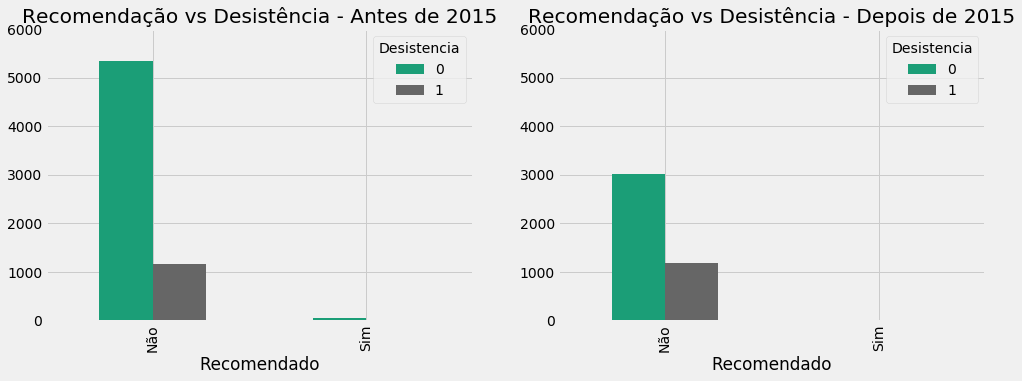

Não    10724
Sim       67
Name: Recomendado, dtype: int64

In [194]:
#RECOMENDAÇÃO

f,ax=plt.subplots(1,2,figsize=(15,5))
pd.crosstab(Curso.loc[Curso['AnoAnálise']=='Antes 2015','Recomendado'], Curso.loc[Curso['AnoAnálise']=='Antes 2015','Desistencia']).plot(kind='bar',ax=ax[0],colormap='Dark2')
ax[0].set_yticks(range(0,7000,1000))
ax[0].set_title('Recomendação vs Desistência - Antes de 2015')
pd.crosstab(Curso.loc[Curso['AnoAnálise']=='Depois 2015','Recomendado'], Curso.loc[Curso['AnoAnálise']=='Depois 2015','Desistencia']).plot(kind='bar',ax=ax[1],colormap='Dark2')
ax[1].set_yticks(range(0,7000,1000))
ax[1].set_title('Recomendação vs Desistência - Depois de 2015')
plt.show()

Curso['Recomendado'].value_counts()

COMMENTS:
- Os níveis de recomendação são extremamente baixos, nomeadamente 67 pessoas recomendadas antes de 2015 e 0 depois de 2015.
- Sem grande feedback nesta variável

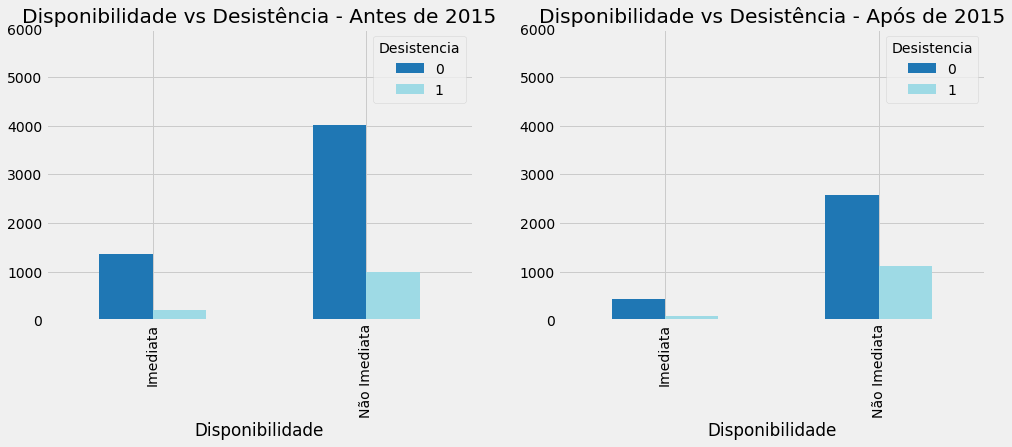

Não Imediata    9188
Imediata        2099
Name: Disponibilidade, dtype: int64

In [10]:
#DISPONIBILIDADE

f,ax=plt.subplots(1,2,figsize=(15,5))
pd.crosstab(Curso.loc[Curso['AnoAnálise']=='Antes 2015','Disponibilidade'], Curso.loc[Curso['AnoAnálise']=='Antes 2015','Desistencia']).plot(kind='bar',ax=ax[0],colormap='tab20')
ax[0].set_yticks(range(0,7000,1000))
ax[0].set_title('Disponibilidade vs Desistência - Antes de 2015')
pd.crosstab(Curso.loc[Curso['AnoAnálise']=='Depois 2015','Disponibilidade'], Curso.loc[Curso['AnoAnálise']=='Depois 2015','Desistencia']).plot(kind='bar',ax=ax[1],colormap='tab20')
ax[1].set_yticks(range(0,7000,1000))
ax[1].set_title('Disponibilidade vs Desistência - Após de 2015')
plt.show()

data['Disponibilidade'].value_counts()

COMMENTS:
- Nota-se o aumento já identificado de desistências, mas sem nenhum padrão em específico.

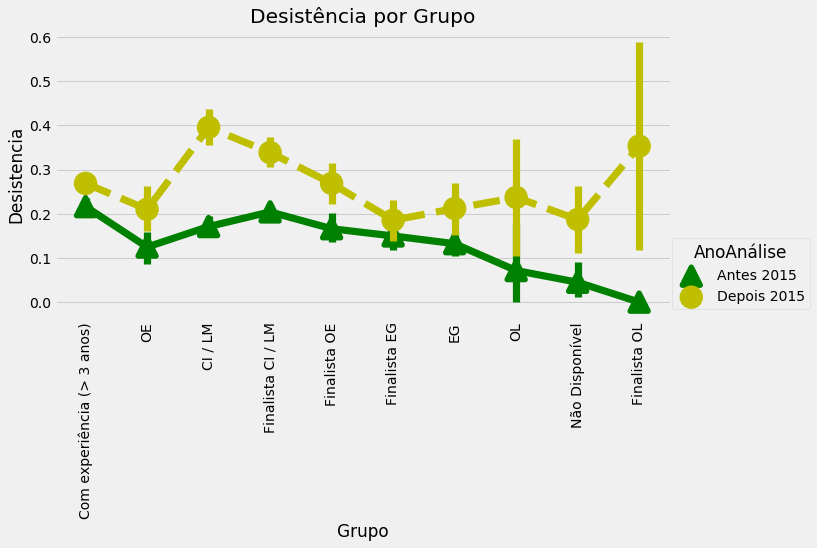

In [203]:
#GRUPO

sns.factorplot('Grupo','Desistencia',hue='AnoAnálise',data=Curso,size=5,aspect=2,
              palette={"Antes 2015": "g", "Depois 2015": "y"},
              markers=["^", "o"], linestyles=["-", "--"])
plt.title('Desistência por Grupo')
plt.xticks(rotation=90)
plt.show()

COMMENTS: A contrariar a curva existente antes de 2015 temos essencialmente dois grupos:
- Cursos em Informática e Matemática
- Cursos de Gestão

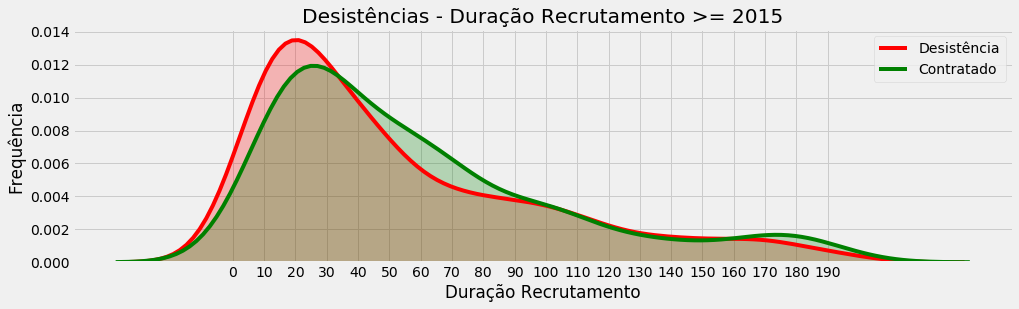

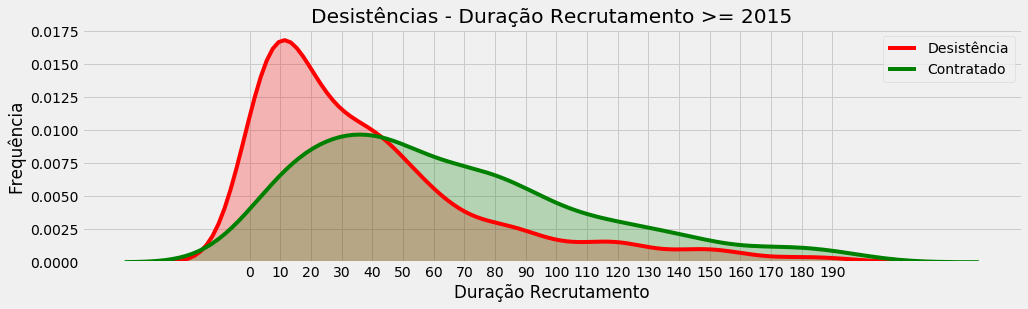

In [54]:
#TOTAL ENTREVISTA

totalentrevista=data.loc[(data['TotalEntrevista']!=0)&(data['TotalEntrevista']<200),]

fig=plt.figure(figsize=(15,4),)
ax=sns.kdeplot(totalentrevista.loc[(totalentrevista['Desistencia']==1)&(totalentrevista['AnoRecepcao']<2015),'TotalEntrevista'],color='r',shade=True,label='Desistência')
ax=sns.kdeplot(totalentrevista.loc[(totalentrevista['Contratado']==1)&(totalentrevista['AnoRecepcao']<2015),'TotalEntrevista'],color='g',shade=True,label='Contratado')
ax.set(xlabel='Duração Recrutamento', ylabel='Frequência',xticks=(range(0,200,10)))
plt.title('Desistências - Duração Recrutamento >= 2015')

fig=plt.figure(figsize=(15,4),)
ax=sns.kdeplot(totalentrevista.loc[(totalentrevista['Desistencia']==1)&(totalentrevista['AnoRecepcao']>=2015),'TotalEntrevista'],color='r',shade=True,label='Desistência')
ax=sns.kdeplot(totalentrevista.loc[(totalentrevista['Contratado']==1)&(totalentrevista['AnoRecepcao']>=2015),'TotalEntrevista'],color='g',shade=True,label='Contratado')
ax.set(xlabel='Duração Recrutamento', ylabel='Frequência',xticks=(range(0,200,10)))
plt.title('Desistências - Duração Recrutamento >= 2015')
plt.show()

COMMENTS:
- Uma evidente diferença de comportamento na distribuição de valores antes de 2015 e depois de 2015
- Um evidente aumento no tempo total de recrutamento:
    - Antes de 2015 o topo da distribuição focava-se entre os 10 e os 40 dias
    - Actualmente estende-se de igual forma até perto de 90 dias
    - Ou seja os candidatos não contratados entre 10 e 30 dias, tipicamente acabam por desistir.

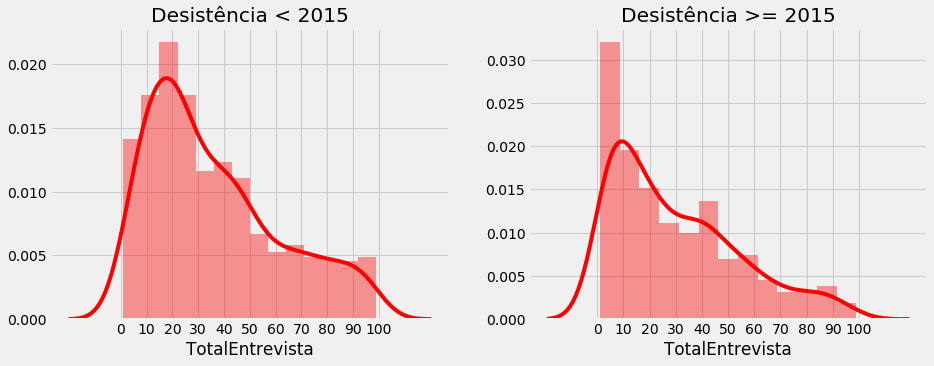

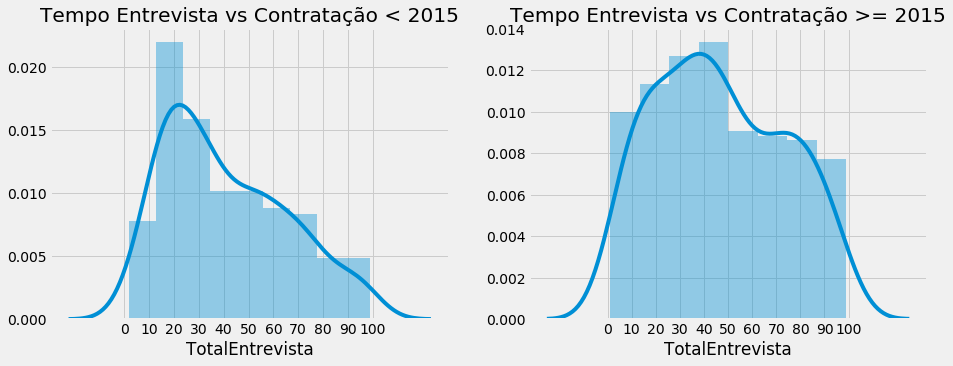

In [8]:
#PESSOAS QUE DESISTIRAM
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.distplot(totalentrevista.loc[(totalentrevista['Desistencia']==1)&(totalentrevista['AnoRecepcao']<2015)&(totalentrevista['TotalEntrevista']<100),'TotalEntrevista'],ax=ax[0],color='r')
ax[0].set_title('Desistência < 2015')
ax[0].set(xticks=(range(0,110,10)))
sns.distplot(totalentrevista.loc[(totalentrevista['Desistencia']==1)&(totalentrevista['AnoRecepcao']>=2015)&(totalentrevista['TotalEntrevista']<100),'TotalEntrevista'],ax=ax[1],color='r')
ax[1].set_title('Desistência >= 2015')
ax[1].set(xticks=(range(0,110,10)))

#PESSOAS CONTRATADAS
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.distplot(totalentrevista.loc[(totalentrevista['Contratado']==1)&(totalentrevista['AnoRecepcao']<2015)&(totalentrevista['TotalEntrevista']<100),'TotalEntrevista'],ax=ax[0])
ax[0].set_title('Tempo Entrevista vs Contratação < 2015')
ax[0].set(xticks=(range(0,110,10)))
sns.distplot(totalentrevista.loc[(totalentrevista['Contratado']==1)&(totalentrevista['AnoRecepcao']>=2015)&(totalentrevista['TotalEntrevista']<100),'TotalEntrevista'],ax=ax[1])
ax[1].set_title('Tempo Entrevista vs Contratação >= 2015')
ax[1].set(xticks=(range(0,110,10)))

plt.show()

COMMENTS:
- Passaram a existir muitos candidatos a desistirem nos primeiros dias (Creio serem o principal motivo do aumento das desistências)
- O gráfico a azul demonstra efectivamente o aumento no tempo de todo o processo.

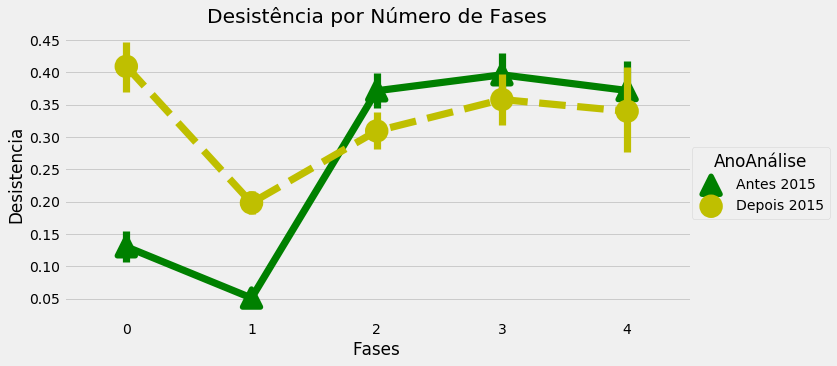

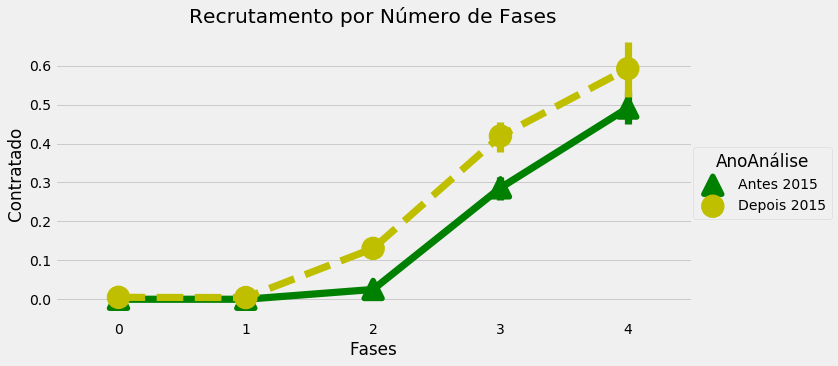

In [23]:
#NUMERO DE FASES

sns.factorplot('Fases','Desistencia',hue='AnoAnálise',data=Curso,size=5,aspect=2,
              palette={"Antes 2015": "g", "Depois 2015": "y"},
              markers=["^", "o"], linestyles=["-", "--"])
plt.title('Desistência por Número de Fases')

sns.factorplot('Fases','Contratado',hue='AnoAnálise',data=Curso,size=5,aspect=2,
              palette={"Antes 2015": "g", "Depois 2015": "y"},
              markers=["^", "o"], linestyles=["-", "--"])
plt.title('Recrutamento por Número de Fases')
plt.show()

COMMENTS:
- Os resultados dão a entender que a número de fases, não tem um impacto directo no aumento das desistências.

In [12]:
data.loc[(data['AnoRecepcao']<2015),['Desistencia','Nível']].groupby(['Nível'])['Desistencia'].agg(['mean','count'])

,mean,count
Nível,,
Director,0.250000,8
Estagiário,0.437500,16
Júnior Base,0.395702,791
Júnior com Experiência,0.320000,275
Manager,0.177778,45
Project Leader,0.213115,61
Team Leader,0.271318,129


In [40]:
data.loc[(data['AnoRecepcao']>=2015),['Desistencia','Nível']].groupby(['Nível'])['Desistencia'].agg(['mean','count'])

,mean,count
Nível,,
Consultor,0.000000,1
Júnior Base,1.000000,1
Júnior com Experiência,0.666667,3
Manager,0.000000,1
Team Leader,0.000000,2


**RESUMO DE RESULTADOS em TAXAS DE DESISTÊNCIA**

- 2008 destaca-se como melhor ano 2008 e 2017 como pior ano;
- A fase de Contratação é a fase com mais desistência. Destaque para grande aumento na fase "POR ANALISAR";
- É maior entre os nascidos entre 1990 e 1996, grande redução dos nascidos entre 1982 e 1988;
- Engenharia IT como curso com mais desistência. Destaque para aumento em cursos de Mat/Est, outros cursos IT e Gestão;
- ISEGI, IST, U.EVORA E ESTRANGEIRO com principais aumentos em termos de desistência por faculdade;
- Aumento evidenciado em Licenciaturas e aumento pouco sentido em Mestrados;
- Grande aumento em candidaturas Espontâneas, Web e Eventos. Sem impacto em candidaturas referenciadas;
- Notado aumento da duração total de processo de recrutamento. Candidatos não recrutados entre 10 a 30 dias, são a grande fonte de desistência;
- Muitos candidatos a desistirem passados apenas 10 dias da recepção da candidatura;

***LIMPEZA DOS DADOS e IMPUTAÇÃO DE DADOS EM FALTA***

In [27]:
datamodel = data.loc[data['AnoRecepcao']>2011,['Desistencia','Idade','Curso', 'Universidade', 'TipoCurso',
                                               'OrigemCandidatura', 'Recomendado','Disponibilidade', 'Grupo',
                                               'TotalEntrevista','Fases']]
#Remover linhas que só tenham Informação NULL
datamodel.drop(datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['Universidade'].isnull())&(datamodel['Curso'].isnull())&
             (datamodel['TipoCurso'].isnull())&(datamodel['OrigemCandidatura'].isnull()),].index,inplace=True)
datamodel.head()

,Desistencia,Idade,Curso,Universidade,TipoCurso,OrigemCandidatura,Recomendado,Disponibilidade,Grupo,TotalEntrevista,Fases
45,0,30.0,IT,ISCTE,Licenciatura,Referenciada,Não,Não Imediata,Finalista CI / LM,2932,4
106,0,52.0,Sem Curso,Sem Universidade,12º Ano,Referenciada,Não,Não Imediata,Com experiência (> 3 anos),25,1
791,0,NaN,Economia,U LUSÓFONA,Licenciatura,Web,Não,Não Imediata,Com experiência (> 3 anos),42,2
840,0,31.0,Gestão,ISCTE,Mestrado,NaN,Não,Não Imediata,Com experiência (> 3 anos),37,2
1749,0,43.0,Engenharia IT,Outra,Licenciatura,Referenciada,Não,Não Imediata,Com experiência (> 3 anos),23,2


In [14]:
columns=[]
values=[]
ratio=[]
for i in datamodel:
    if datamodel[i].isnull().sum() > 0:
        columns.append(i)
        values.append(datamodel[i].isnull().sum())
        ratio.append(datamodel[i].isnull().sum()/len(datamodel)*100)
missingvariables=pd.DataFrame({'Columns':columns,'Totalmissing':values,'Percentagem':ratio}).sort_values(by=['Totalmissing'],ascending=False)
missingvariables

#ou
# missingvariables=[]
# for i in data2014:
#     if data2014[i].isnull().sum() > 0:
#         missingvariables.append(i)
# missingvariables

,Columns,Percentagem,Totalmissing
0,Idade,23.962236,1599
2,Universidade,3.132025,209
1,Curso,2.652480,177
3,TipoCurso,1.873220,125
4,OrigemCandidatura,1.153904,77


In [28]:
#UNIVERSIDADE
datamodel.drop(datamodel.loc[datamodel['Universidade'].isnull(),].index,inplace=True)

#CURSO
datamodel.loc[(datamodel['Curso'].isnull())&(datamodel['Universidade']=='IST'),'Curso']='Engenharia'
datamodel.loc[(datamodel['Curso'].isnull())&(datamodel['Grupo']=='CI / LM'),'Curso']='IT'
datamodel.drop(datamodel.loc[datamodel['Curso'].isnull(),].index,inplace=True)

#TIPOCURSO
datamodel.drop(datamodel.loc[datamodel['TipoCurso'].isnull(),['TipoCurso','Universidade','Curso']].index,inplace=True)



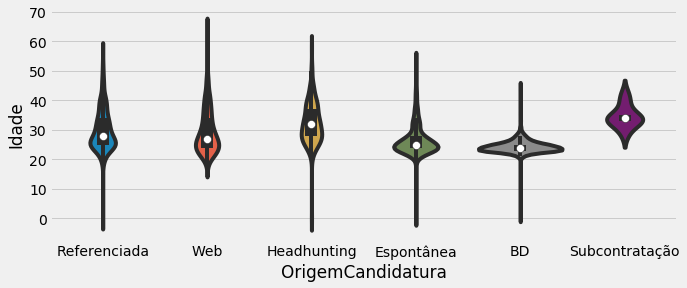

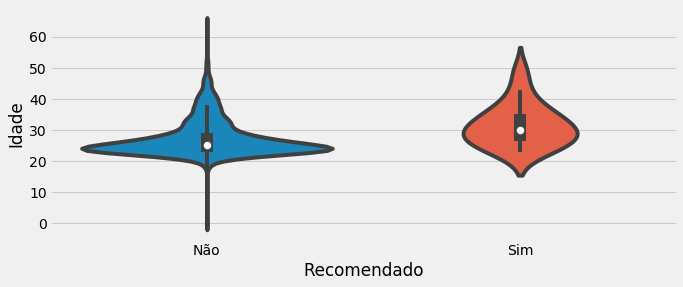

In [29]:
#Imputar informação em falta em IDADE
fig=plt.figure(figsize=(10,4),)
ax=sns.violinplot('OrigemCandidatura','Idade',data=datamodel.loc[datamodel['OrigemCandidatura']!='Evento',])

fig=plt.figure(figsize=(10,4),)
ax=sns.violinplot('Recomendado','Idade',data=datamodel)
plt.show()

datamodel.groupby(['OrigemCandidatura','Recomendado'])['Recomendado','Idade'].mean().round()

datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='BD') | 
              (datamodel['OrigemCandidatura']=='Evento') & (datamodel['Recomendado']=='Não'),'Idade']=24
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Espontânea')&
              (datamodel['Recomendado']=='Não'),'Idade']=27
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Headhunting')&
              (datamodel['Recomendado']=='Não'),'Idade']=33
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Headhunting')&
              (datamodel['Recomendado']=='Sim'),'Idade']=32
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Referenciada')&
              (datamodel['Recomendado']=='Não'),'Idade']=30
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Referenciada')&
              (datamodel['Recomendado']=='Sim'),'Idade']=31
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Subcontratação')&
              (datamodel['Recomendado']=='Não'),'Idade']=35
datamodel.loc[(datamodel['Idade'].isnull())&(datamodel['OrigemCandidatura']=='Web')&
              (datamodel['Recomendado']=='Não'),'Idade']=30


In [30]:
#Idade e Orgem de Candidatura
datamodel.drop(datamodel.loc[datamodel['Idade'].isnull(),['Idade','OrigemCandidatura']].index,inplace=True)
datamodel.drop(datamodel.loc[datamodel['OrigemCandidatura'].isnull(),].index,inplace=True)
datamodel['Idade']=datamodel['Idade'].astype('int64')

In [31]:
for i in datamodel:
    if datamodel[i].isnull().sum()>0:
        print(i)
    if datamodel[i].isnull().sum()==0:
        print('A variável {} não tem dados em Falta'.format(i))

A variável Desistencia não tem dados em Falta
A variável Idade não tem dados em Falta
A variável Curso não tem dados em Falta
A variável Universidade não tem dados em Falta
A variável TipoCurso não tem dados em Falta
A variável OrigemCandidatura não tem dados em Falta
A variável Recomendado não tem dados em Falta
A variável Disponibilidade não tem dados em Falta
A variável Grupo não tem dados em Falta
A variável TotalEntrevista não tem dados em Falta
A variável Fases não tem dados em Falta


In [35]:
# FOR REPLACING STRINGS

def replacing(x,df):
    replace_var=[]
    unique=df[x].unique()
    for i in range (len(df[x].unique())):
        replace_var.append(i)
    df[x].replace(unique,replace_var,inplace=True)

for i in datamodel.iloc[:,2:9]:
    replacing(i,datamodel)

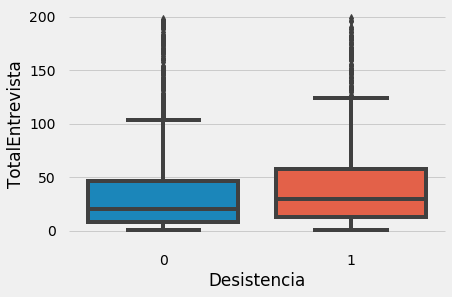

In [51]:
#ANALISAR OUTLIERS - VER DEPOIS

sns.boxplot('Desistencia','TotalEntrevista',data=datamodel.loc[(data['TotalEntrevista']!=0)&(data['TotalEntrevista']<200),])
sns.despine(offset=10, trim=True)
plt.show()

#datamodel.loc[(data['TotalEntrevista']!=0)&(data['TotalEntrevista']<200),]

In [55]:
#DEFINITION OF VARIABLES FOR MODELLING

y=datamodel.loc[:,'Desistencia']
X=datamodel.iloc[:,1:]

Iteration nº:  1
[5.1429017313636844, 4.3652409570160833, 3.392647651495905, 2.6277182816779976, 3.1503489183776305, 1.0098273518396426, 1.3437499159110029, 2.5345621234108808, 1.2122902337071262, 3.1692427354413382]
With the value of.:   5.14290173136

Max vif is for variable.:  Idade


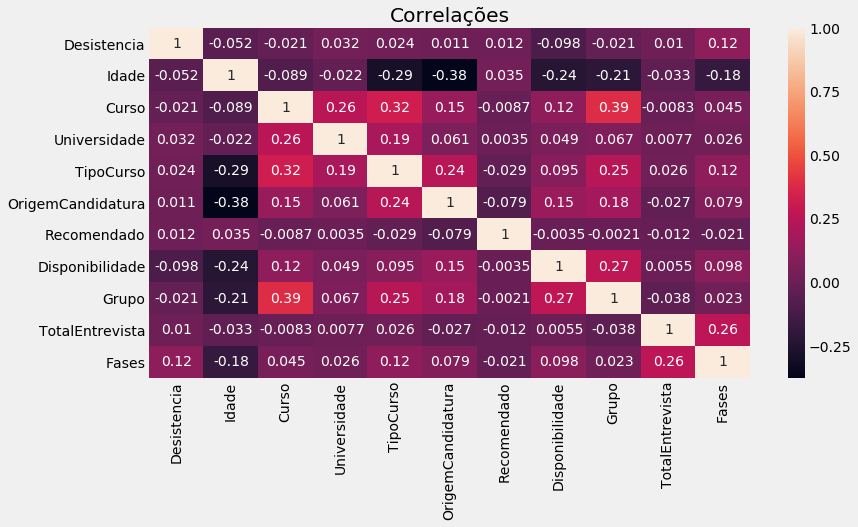

In [74]:
#COLLINEARITY

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    threeshold=10
    output=pd.DataFrame()
    vif=[variance_inflation_factor(np.array(X.values,dtype='float'),j) for j in range (X.shape[1])]
    for i in range (1,X.shape[1]):
        print('Iteration nº: ',i)
        print(vif)
        a=np.argmax(vif)
        print('With the value of.:  ',vif[a])
        print('')
        print('Max vif is for variable.: ',X.columns[a])
        if vif[a] <= threeshold:
            break
        if i == 1:
            output = X.drop(X.columns[a], axis = 1)
            vif=[variance_inflation_factor(np.array(output.values,dtype='float'),j) for j in range (output.shape[1])]
        elif i > 1:
            output = output.drop(output.columns[a], axis = 1)
            vif=[variance_inflation_factor(np.array(output.values,dtype='float'),j) for j in range (output.shape[1])]
        return(output.collumns)
    
calculate_vif(X)

fig=plt.figure(figsize=(12,6),)
sns.heatmap(datamodel.corr(),annot=True,)
plt.title('Correlações')
plt.show()


***CRIAÇÃO DO MODELO***

***Testar Vários Modelos**

In [109]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
prediction1=model.predict(x_test)

from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
prediction2=model.predict(x_test)

model=SVC(kernel='linear')
model.fit(x_train,y_train)
prediction3=model.predict(x_test)

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
prediction4=model.predict(x_test)

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction5=model.predict(x_test)

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
prediction6=model.predict(x_test)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
prediction7=model.predict(x_test)

from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train,y_train)
prediction8=model.predict(x_test)

from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)
prediction9=model.predict(x_test)

from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
prediction10=model.predict(x_test)

# from xgboost import XGBClassifier
# model=XGBClassifier()
# model.fit(x_train,y_train)
# prediction11=model.predict(x_test)

from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_train,y_train)
prediction13=model.predict(x_test)

# from lightgbm import LGBMClassifier
# model=LGBMClassifier()
# model.fit(x_train,y_train)
# prediction14=model.predict(x_test)

print('Accuracy for Logistic Regression is: {}%'.format(round(metrics.accuracy_score(y_test,prediction1),4)*100))
print('Accuracy for rbf SVM is: {}%'.format(round(metrics.accuracy_score(y_test,prediction2),4)*100))
print('Accuracy for linear SVM is: {}%'.format(round(metrics.accuracy_score(y_test,prediction3),4)*100))
print('Accuracy for Random Forest is: {}%'.format(round(metrics.accuracy_score(y_test,prediction4),4)*100))
print('Accuracy for Decision Trees is: {}%'.format(round(metrics.accuracy_score(y_test,prediction5),4)*100))
print('Accuracy for KNN is: {}%'.format(round(metrics.accuracy_score(y_test,prediction6),4)*100))
print('Accuracy for Naive Bayes is: {}%'.format(round(metrics.accuracy_score(y_test,prediction7),4)*100))
print('Accuracy for Neural Networks is: {}%'.format(round(metrics.accuracy_score(y_test,prediction8),4)*100))
print('Accuracy for AdaBoost is: {}%'.format(round(metrics.accuracy_score(y_test,prediction9),4)*100))
print('Accuracy for GradientBoosting is: {}%'.format(round(metrics.accuracy_score(y_test,prediction10),4)*100))
# print('Accuracy for XGBoost is: {}%'.format(round(metrics.accuracy_score(y_test,prediction11),4)*100))
print('Accuracy for ExtraTrees is: {}%'.format(round(metrics.accuracy_score(y_test,prediction13),4)*100))
# print('Accuracy for LGBoost is: {}%'.format(round(metrics.accuracy_score(y_test,prediction14),4)*100))

Accuracy for Logistic Regression is: 75.48%
Accuracy for rbf SVM is: 76.58%
Accuracy for linear SVM is: 75.53999999999999%
Accuracy for Random Forest is: 74.8%
Accuracy for Decision Trees is: 67.47%
Accuracy for KNN is: 72.66%
Accuracy for Naive Bayes is: 73.65%
Accuracy for Neural Networks is: 75.42999999999999%
Accuracy for AdaBoost is: 75.07000000000001%
Accuracy for GradientBoosting is: 76.58%
Accuracy for ExtraTrees is: 74.02%


**Optimização de Modelos - Hyper Parameters** - rbf SVM, RandomForest, GradientBoosting